## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [3]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
# Use Assignment 0 for reference.
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range(1, 2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range(1, 201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Compute weight vectors

In [4]:
def mean(matrix):
  number_of_rows = matrix.shape[0]
  sum = np.sum(matrix, axis = 0)
  return sum/number_of_rows

def scatter_matrix(matrix_a, matrix_b):
  m1, m2 = mean(matrix_a), mean(matrix_b)
  s1, s2 = 0, 0
  for i in range(0, matrix_a.shape[0]):
    s1 += (matrix_a[i] - m1).reshape(np.array([matrix_a[i] - m1]).shape[1], np.array([matrix_a[i] - m1]).shape[0]) @ (matrix_a[i] - m1).reshape(np.array([matrix_a[i] - m1]).shape[0], np.array([matrix_a[i] - m1]).shape[1])
  for i in range(0, matrix_b.shape[0]):
    s2 += (matrix_b[i] - m2).reshape(np.array([matrix_b[i] - m2]).shape[1], np.array([matrix_b[i] - m2]).shape[0]) @ (matrix_b[i] - m2).reshape(np.array([matrix_b[i] - m2]).shape[0], np.array([matrix_b[i] - m2]).shape[1])
  return s1 + s2

def weight_vector(matrix_a, matrix_b):
  inverse_scatter_matrix = np.linalg.pinv(scatter_matrix(matrix_a, matrix_b))
  m1, m2 = mean(matrix_a), mean(matrix_b)
  return inverse_scatter_matrix @ (m1 - m2).reshape(np.array([m1 - m2]).shape[1], np.array([m1 - m2]).shape[0])

Ws = weight_vector(train[0:240], train[240:])
for i in range(1, 10):
  Ws = np.concatenate((Ws, weight_vector(train[i*240:(i+1)*240], np.concatenate((train[0:i*240], train[(i+1)*240:])))), axis = 1)


## Compute confusion matrix

In [5]:
# Please return a variable named confusion_matrix so the next cell would work.
results = test @ Ws
predictions = np.argmax(results, axis=1)
confusion_matrix = np.zeros((10, 10))
for i in range(0, len(predictions)):
  confusion_matrix[int(test_labels[i]), int(predictions[i])] += 1

## Plot confusion matrix and print accuracy

Overall accuracy:  0.77


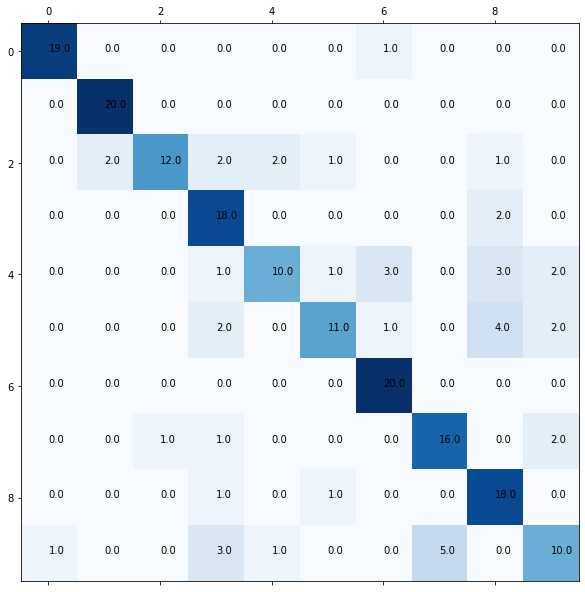

In [6]:
# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

## Compute bias node for each classifier

In [7]:
def get_bias_node(w, matrix_a, matrix_b):
  midway = (mean(matrix_a) + mean(matrix_b))/2
  return -1*(w.T @ midway)

bias_nodes = []
for i in range(0, 10):
  bias_nodes.append(get_bias_node(Ws[:, i], train[i*240:(i+1)*240], np.concatenate((train[0:i*240], train[(i+1)*240:]))))

## Compute confusion matrix

In [8]:
# Please return a variable named confusion_matrix so the next cell would work.
results_bias = (test @ Ws) + np.repeat([bias_nodes], repeats=[200], axis=0)
predictions_bias = np.argmax(results_bias, axis=1)
confusion_matrix = np.zeros((10, 10))
for i in range(0, len(predictions_bias)):
  confusion_matrix[int(test_labels[i]), int(predictions_bias[i])] += 1

## Plot confusion matrix and print accuracy

Overall accuracy:  0.805


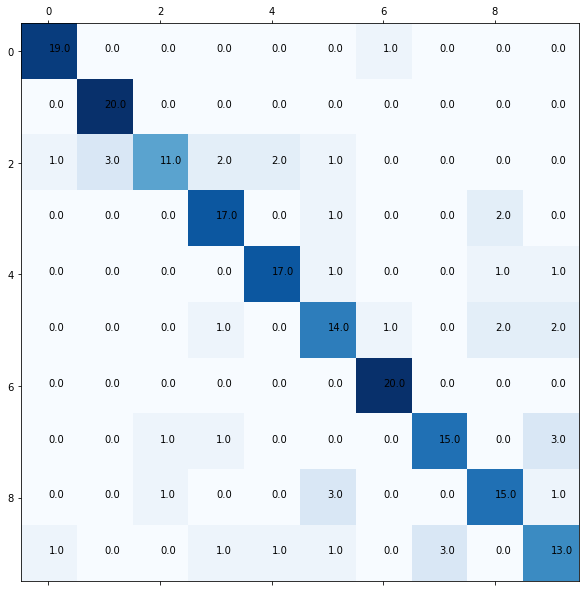

In [9]:
# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
        
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])